#**LOAD BTC DATASET**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BTC-USD.csv', index_col = 0, parse_dates = True, na_values = 0).dropna()

from datetime import timedelta

data =  data.loc['2017-11-29':]

data = data[:-90] # To cut the data and try earlier test timeframes


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-29,10077.400391,11517.400391,9601.030273,9888.610352,9888.610352,1.156880e+10
2017-11-30,9906.790039,10801.000000,9202.049805,10233.599609,10233.599609,8.310690e+09
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6.783120e+09
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5.138500e+09
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6.608310e+09


# **CREATE NEW FEATURES**

In [ ]:
'''
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
'''

'\n!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz\n!tar -xzvf ta-lib-0.4.0-src.tar.gz\n%cd ta-lib\n!./configure --prefix=/usr\n!make\n!make install\n!pip install Ta-Lib\n'

In [ ]:
import talib as ta
data["EMA5"] = ta.EMA(data['Close'], timeperiod = 5)

data['DI5'] = (data['Close'] - data['EMA5']) / data['EMA5'] * 100

data["LowK"], data["SlowD"] = ta.STOCH(data["High"], data["Low"], data["Close"], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

data["MOM"] = ta.MOM(data['Close'], timeperiod=10)

data["ROC"] = ta.ROC(data['Close'], timeperiod=10)

data["WILLR"] = ta.WILLR(data["High"], data["Low"], data["Close"], timeperiod=14)

data["ADOSC"] = ta.ADOSC(data["High"], data["Low"], data["Close"], data["Volume"], fastperiod=3, slowperiod=10)

data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,DI5,LowK,SlowD,MOM,ROC,WILLR,ADOSC
Date,,,,,,,,,,,,,,
2017-12-12,16919.800781,17781.800781,16571.599609,17415.400391,17415.400391,1.460380e+10,16314.980992,6.744840,69.667582,63.622333,6340.800782,57.255350,-10.249853,1.882038e+10
2017-12-13,17500.000000,17653.099609,16039.700195,16408.199219,16408.199219,1.297690e+10,16346.053734,0.380186,74.639385,68.130144,5084.999024,44.907791,-21.255892,1.502434e+10
2017-12-14,16384.599609,17085.800781,16185.900391,16564.000000,16564.000000,1.377740e+10,16418.702489,0.884951,74.938374,73.081780,4906.799805,42.092438,-20.665805,1.140555e+10
2017-12-15,16601.300781,18154.099609,16601.300781,17706.900391,17706.900391,1.431000e+10,16848.101790,5.097302,75.615067,75.064275,5790.200196,48.588956,-8.629895,1.081885e+10
2017-12-16,17760.300781,19716.699219,17515.300781,19497.400391,19497.400391,1.274060e+10,17731.201324,9.960967,83.678569,78.077337,5205.900391,36.426550,-2.476638,1.284147e+10


In [ ]:
y = np.ones(len(data.Close))
y = np.where(data.Close.shift(-1) > data.Close, 1, 0) 

y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
np.ones((len(data.Close),3))[2]

array([1., 1., 1.])

#**DATA SCALING**



In [ ]:
max_=data[['Open','High','Low','Close']].max().max()
min_=data[['Open','High','Low','Close']].min().min()

scl=MinMaxScaler()

X1=(data[['Open','High','Low','Close']]-min_)/(max_-min_)
X2=scl.fit_transform(data[['Volume']].values.reshape(-1,1))

X3 = scl.fit_transform(data[['EMA5']].values.reshape(-1,1))
X4 = scl.fit_transform(data[['DI5']].values.reshape(-1,1))

X5 = scl.fit_transform(data[['LowK']].values.reshape(-1,1))
X6 = scl.fit_transform(data[['SlowD']].values.reshape(-1,1))
X7 = scl.fit_transform(data[['MOM']].values.reshape(-1,1))

X8 = scl.fit_transform(data[['ROC']].values.reshape(-1,1))

X9 = scl.fit_transform(data[['WILLR']].values.reshape(-1,1))

X10 = scl.fit_transform(data[['ADOSC']].values.reshape(-1,1))

X1=np.array(X1)

data=data.assign(Open=X1[:,0])
data=data.assign(High=X1[:,1])
data=data.assign(Low=X1[:,2])
data=data.assign(Close=X1[:,3])
data=data.assign(Volume=X2[:,0])
data=data.assign(EMA5=X3)
data=data.assign(DI5=X4)
data=data.assign(LowK=X5)
data=data.assign(SlowD=X6)
data=data.assign(MOM=X7)
data=data.assign(ROC=X8)
data=data.assign(WILLR=X9)
data=data.assign(ADOSC=X10)
data.head(60)

,Open,High,Low,Close,Adj Close,Volume,EMA5,DI5,LowK,SlowD,MOM,ROC,WILLR,ADOSC
Date,,,,,,,,,,,,,,
2017-12-12,0.812448,0.863461,0.791841,0.841777,17415.400391,0.163971,0.855896,0.874126,0.705034,0.642626,1.000000,1.000000,0.897501,0.683551
2017-12-13,0.846784,0.855844,0.760364,0.782171,16408.199219,0.141131,0.857940,0.721898,0.758106,0.693384,0.898540,0.878004,0.787441,0.631919
2017-12-14,0.780775,0.822272,0.769016,0.791392,16564.000000,0.152369,0.862720,0.733971,0.761298,0.749139,0.884143,0.850188,0.793342,0.582697
2017-12-15,0.793599,0.885493,0.793599,0.859028,17706.900391,0.159846,0.890969,0.834721,0.768521,0.771462,0.955515,0.914375,0.913701,0.574717
2017-12-16,0.862188,0.977967,0.847689,0.964989,19497.400391,0.137814,0.949065,0.951048,0.854596,0.805388,0.908308,0.794208,0.975234,0.602228
2017-12-17,0.963711,1.000000,0.934021,0.943886,19140.800781,0.145872,0.979976,0.836294,0.866402,0.842344,0.587980,0.502813,0.894729,0.557212
2017-12-18,0.941850,0.957509,0.897436,0.942312,19114.199219,0.167279,1.000000,0.791484,0.835413,0.865864,0.693309,0.586051,0.885107,0.558739
2017-12-19,0.942554,0.946076,0.833492,0.863159,17776.699219,0.196128,0.984019,0.649178,0.620729,0.783634,0.697648,0.603455,0.716824,0.512855
2017-12-20,0.862188,0.872509,0.762613,0.794978,16624.599609,0.269903,0.948101,0.565389,0.396741,0.618497,0.582170,0.509051,0.495162,0.446934


In [ ]:
data.shape

(825, 14)

#**DEFINE INPUTS AND TARGET FEATURES**

In [ ]:
X=data[['Open','High','Low','Close','Volume', 'DI5', 'LowK', 'SlowD', 'MOM', 'ROC', 'WILLR', 'ADOSC']]
#y=data.Close.shift(-1)

In [ ]:
timestep=1
X_list=[]
#y_list=[]
y_list = y[:-1]
for i in range(timestep,len(X)):
    X_list.append(np.array(X.iloc[i-timestep:i]))
    #y_list.append(y.iloc[i])

test_size=30
X_train=np.array(X_list)[:-test_size]
y_train=np.array(y_list)[:-test_size]
X_test=np.array(X_list)[-test_size:]
y_test=np.array(y_list)[-test_size:]

X_train

array([[[0.81244786, 0.86346073, 0.79184143, ..., 1.        ,
         0.89750147, 0.68355145]],

       [[0.84678385, 0.85584423, 0.7603638 , ..., 0.87800399,
         0.78744108, 0.63191873]],

       [[0.78077483, 0.82227168, 0.76901588, ..., 0.85018782,
         0.79334195, 0.58269693]],

       ...,

       [[0.39440809, 0.41536722, 0.38691851, ..., 0.52007347,
         0.99834457, 0.95835163]],

       [[0.41491361, 0.42623016, 0.41491361, ..., 0.53810525,
         0.94725433, 1.        ]],

       [[0.42210827, 0.43001858, 0.40981075, ..., 0.53220602,
         0.81912234, 0.87427556]]])

In [ ]:
X_train.shape

(794, 1, 12)

In [ ]:
y_train.shape

(794,)

#**CREATE LSTM MODEL**

In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

dropout_ratio = 0.4
act = 'tanh'

model=Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(4, return_sequences=True))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(100, activation=act))
model.add(Dropout(dropout_ratio))
model.add(Dense(200, activation=act))
model.add(Dropout(dropout_ratio))
#model.add(Dense(300, activation=act))
#model.add(Dropout(dropout_ratio))
#model.add(Dense(1024, activation=act))
#model.add(Dropout(dropout_ratio))
#model.add(Dense(2048, activation=act))
#model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 1, 4)              272       
_________________________________________________________________
lstm_55 (LSTM)               (None, 1, 4)              144       
_________________________________________________________________
lstm_56 (LSTM)               (None, 4)                 144       
_________________________________________________________________
dense_102 (Dense)            (None, 100)               500       
_________________________________________________________________
dropout_73 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 200)               20200     
_________________________________________________________________
dropout_74 (Dropout)         (None, 200)             

#**FIT MODEL AND SAVE BEST WEIGHTS**

In [ ]:
filepath="LSTM-weights-btc.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history = model.fit(X_train, y_train, epochs=200, batch_size=25, verbose=1, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/200
21/26 [=======================>......] - ETA: 0s - loss: 0.6923 - accuracy: 0.5295
Epoch 00001: val_loss improved from inf to 0.71312, saving model to LSTM-weights-btc.hdf5
26/26 [==============================] - 1s 47ms/step - loss: 0.6954 - accuracy: 0.5213 - val_loss: 0.7131 - val_accuracy: 0.4591
Epoch 2/200
22/26 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5418
Epoch 00002: val_loss improved from 0.71312 to 0.69476, saving model to LSTM-weights-btc.hdf5
26/26 [==============================] - 0s 7ms/step - loss: 0.6913 - accuracy: 0.5323 - val_loss: 0.6948 - val_accuracy: 0.4591
Epoch 3/200
21/26 [=======================>......] - ETA: 0s - loss: 0.6924 - accuracy: 0.5238
Epoch 00003: val_loss did not improve from 0.69476
26/26 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5228 - val_loss: 0.7022 - val_accuracy: 0.4591
Epoch 4/200
25/26 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.52

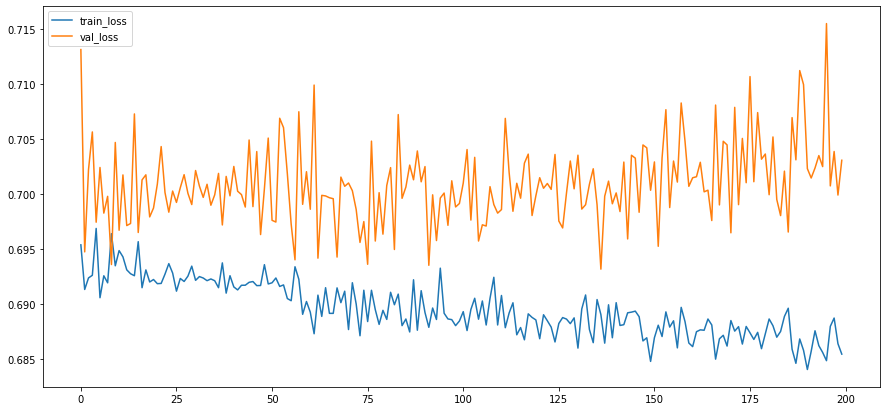

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train_loss", "val_loss"])

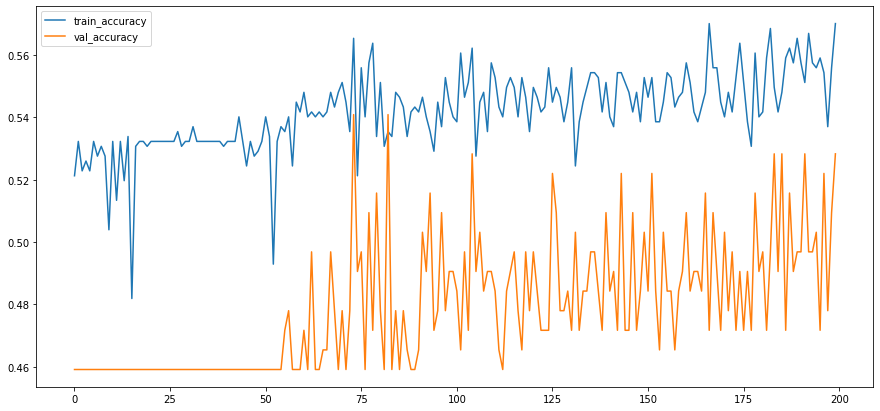

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train_accuracy", "val_accuracy"])

#**TEST PREDICTIONS**

In [ ]:
model.load_weights(filepath)

descale = (max_-min_)+min_

predict_trend = np.ones(len(X_test))
for i in range(X_test.shape[0]):    
    predict_trend[i] = np.where(model.predict(np.expand_dims(X_test[i],axis=0))[0][0]>0.5,1,-1)
predict_trend = np.reshape(predict_trend,(1,-1)).tolist()[0]
y_test = np.where(y_test == 0, -1, 1)

from sklearn.metrics import accuracy_score
acc= accuracy_score(list(y_test),list(predict_trend))

print("The Accuracy of the model on the test set is:",acc*100,'%')
print("\n\n\nThe Signals Predicted\n",list(predict_trend))

The Accuracy of the model on the test set is: 40.0 %



The Signals Predicted
 [1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# **MEASURE MODEL PERFORMANCE**

Market profit: -64.58%


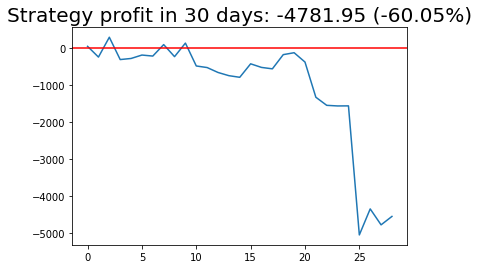

In [ ]:
# TEST FOR PROFIT CONSIDERING LONG-SHORT STRATEGY

sample = pd.DataFrame([data.Close[-30:].tolist(), predict_trend])
sample = sample.T
sample.columns=['Actual','Position']
sample.Actual *= descale
sample['Profit'] = sample.Position * (sample.shift(-1).Actual - sample.Actual)

plt.title("Profit per day over history",fontsize=20)
sample['Wealth'] = sample['Profit'].cumsum()
sample.Wealth.plot()
plt.axhline(y=0, color='red')
plt.title("Strategy profit in {:.0f} days: {:.2f} ({:.2f}%)".format(
    len(sample.index),
    sample.loc[sample.index[-3], 'Wealth'],
    sample.loc[sample.index[-3], 'Wealth']/sample.loc[sample.index[0], 'Actual']*100),
    fontsize=20)

print("Market profit: {:.2f}%".format((sample.loc[sample.index[-3], 'Actual']/sample.loc[0, 'Actual']-1)*100))

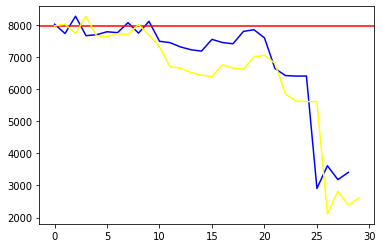

In [ ]:
# Visualize Model vs Market (Buy&Hold) side by side

sample['TotalWealth'] = sample['Wealth'] + sample.Actual[0]
sample.TotalWealth.plot(color="blue")
plt.axhline(y=sample.Actual[0], color='red')
sample.Actual.plot(color='yellow')

In [ ]:
# Measure percentage of days where profit was positive:

(len(sample.loc[sample.Profit > 0])/len(sample))*100

40.0

Market profit: -64.58%


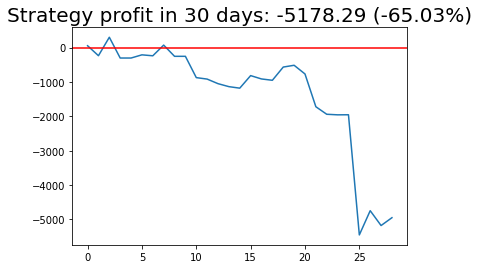

In [ ]:
# TEST FOR PROFIT CONSIDERING LONG ONLY STRATEGY
sample['Profit'].loc[sample['Position'] == -1] = 0

plt.title("Profit per day over history",fontsize=20)
sample['Wealth'] = sample['Profit'].cumsum()
sample.Wealth.plot()
plt.axhline(y=0, color='red')
plt.title("Strategy profit in {:.0f} days: {:.2f} ({:.2f}%)".format(
    len(sample.index),
    sample.loc[sample.index[-3], 'Wealth'],
    sample.loc[sample.index[-3], 'Wealth']/sample.loc[sample.index[0], 'Actual']*100),
    fontsize=20)

print("Market profit: {:.2f}%".format((sample.loc[sample.index[-3], 'Actual']/sample.loc[0, 'Actual']-1)*100))

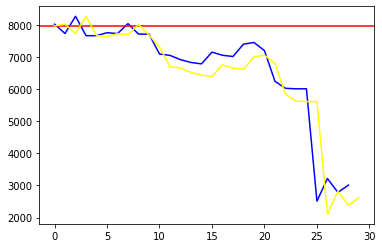

In [ ]:
# Visualize Model vs Market (Buy&Hold) side by side

sample['TotalWealth'] = sample['Wealth'] + sample.Actual[0]
sample.TotalWealth.plot(color="blue")
plt.axhline(y=sample.Actual[0], color='red')
sample.Actual.plot(color='yellow')